In [1]:
import quandl
quandl.ApiConfig.api_key = 'rc8dcATnmTcoCa7bKBCm'

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [4]:
aapl = quandl.get('EOD/AAPL')
mstf = quandl.get('EOD/MSFT')
nke = quandl.get('EOD/NKE')
v = quandl.get('EOD/V')
aapl.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,493.10,500.60,487.35,488.580,11854600.0,0.0,1.0,63.019032,63.977544,62.284172,62.441368,82982200.0
2013-09-04,499.56,502.24,496.28,498.691,12322600.0,0.0,1.0,63.844631,64.187139,63.425441,63.733571,86258200.0
2013-09-05,500.25,500.68,493.64,495.270,8441700.0,0.0,1.0,63.932814,63.987769,63.088044,63.296361,59091900.0
2013-09-06,498.44,499.38,489.95,498.220,12840200.0,0.0,1.0,63.701493,63.821626,62.616456,63.673376,89881400.0
2013-09-09,505.00,507.92,503.48,506.170,12167400.0,0.0,1.0,64.539872,64.913053,64.345613,64.689400,85171800.0


In [62]:
df = pd.DataFrame({"AAPL": aapl["Adj_Close"],
                   "MSTF": mstf["Adj_Close"],
                   "NKE": nke["Adj_Close"],
                   "V": v["Adj_Close"]}, index=aapl.index)
df.head()

,AAPL,MSTF,NKE,V
Date,,,,
2013-09-03,62.441368,27.747702,29.892500,42.413492
2013-09-04,63.733571,27.151492,30.283069,42.214626
2013-09-05,63.296361,27.186307,30.399310,42.219418
2013-09-06,63.673376,27.114065,30.213325,42.329633
2013-09-09,64.689400,27.551866,30.408609,42.780075


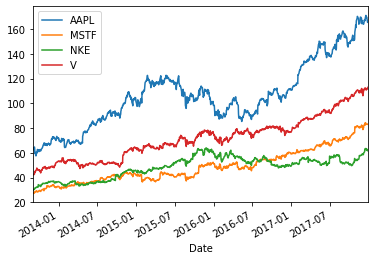

In [13]:
df["AAPL"].plot(label="AAPL");
df["MSTF"].plot(label="MSTF");
df["NKE"].plot(label="NKE");
df["V"].plot(label="V");
plt.legend();

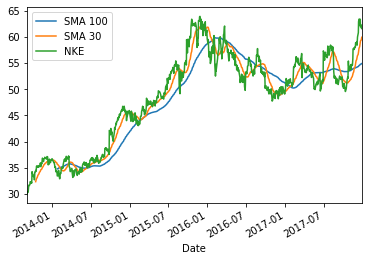

In [15]:
r100 = df["NKE"].rolling(100).mean()
r30 = df["NKE"].rolling(30).mean()
r100.plot(label="SMA 100");
r30.plot(label="SMA 30");
df["NKE"].plot(label="NKE");
plt.legend();

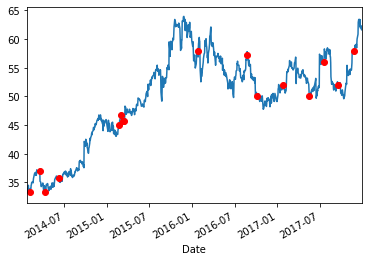

In [52]:
r100_nonan = r100["2014-01-24":]
r30_nonan = r30["2014-01-24":]

if r100_nonan["2014-01-24"] > r30_nonan["2014-01-24"]:
    r100_may = 1
else:
    r100_may = 0

dates = []
prices = []

for i in r100_nonan.index:
    if r100_may == 1 and r100_nonan[i] < r30_nonan[i]:
        r100_may = 0
        dates.append(i)
        prices.append(df["NKE"][i])
    elif r100_may == 0 and r100_nonan[i] > r30_nonan[i]:
        r100_may = 1
        dates.append(i)
        prices.append(df["NKE"][i])

df["NKE"]["2014-01-24":].plot();
plt.plot(dates, prices, 'ro');

In [63]:
tick = ["AAPL", "MSTF", "NKE", "V"]
df_rend = df
df.bfill()
df_s = df.shift(1)
for t in tick:
    df_rend[t] = (df[t] - df_s[t]) / df_s[t]
df_rend = df_rend.drop(df_rend.index[0])
df_rend

,AAPL,MSTF,NKE,V
Date,,,,
2013-09-04,0.020695,-0.021487,0.013066,-0.004689
2013-09-05,-0.006860,0.001282,0.003838,0.000114
2013-09-06,0.005956,-0.002657,-0.006118,0.002611
2013-09-09,0.015957,0.016147,0.006464,0.010641
2013-09-10,-0.022779,0.023219,0.021713,0.033828
...,...,...,...,...
2017-12-21,0.003785,-0.000234,0.018556,0.002587
2017-12-22,0.000000,0.000117,-0.022850,0.002491
2017-12-26,-0.025370,-0.001286,0.005688,0.002662


In [64]:
datos = []
index = []
for t in tick:
    datos.append(df_rend[t].mean())
    index.append(t)
rends = pd.Series(datos, index=index, name="daily")
rends

AAPL    0.001000
MSTF    0.001103
NKE     0.000757
V       0.000978
Name: daily, dtype: float64

In [65]:
rends_an = rends * 252
rends_an

AAPL    0.252123
MSTF    0.277918
NKE     0.190799
V       0.246471
Name: daily, dtype: float64

In [68]:
# Generación de ponderadores aleatorios
from random import seed
import numpy as np

seed(314)
w = np.random.random(size=4)
w = w / w.sum()

In [69]:
np.dot(w, rends)

0.0009117019163476485

In [70]:
np.dot(w, rends_an)

0.2297488829196074

In [76]:
m_cov = (df_rend * 252).cov()
m_cov

,AAPL,MSTF,NKE,V
AAPL,12.958800,5.022185,3.308254,3.847103
MSTF,5.022185,11.848638,3.726985,5.105105
NKE,3.308254,3.726985,11.939464,4.223672
V,3.847103,5.105105,4.223672,9.892338


In [80]:
var = np.dot(np.dot(w.T, m_cov), w)
var

3573.390965057385

In [81]:
desv = var ** 0.5
desv

59.77784677501679

In [ ]:
#¿Cuándo Usamos Numpy y cuando Pandas?
#Usamos Numpy cuando tenemos un arreglo de valores del mismo tipo, mientras que pandas agrupa 'columnas' de distintos tipos de valores

#¿Qué es el axis en numpy/pandas?
#Indica el eje (vertical / horizontal, x / y, filas / columnas)

#¿Cuándo usar webscrapping y cuándo un API?
#Webscrapping se usa cuando queremos automatizar la extracción de información de una página Web a través de su código fuente
#Los APIS se utilizan para obtener bloques predefinidos de información (tales como precios diarios de acciones)